In [2]:
import numpy as np, pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [3]:
#Loading the dataset into dataframe
df=pd.read_csv("ev_car.csv")
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,INR
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,460,70.0,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480,4540988.068
1,Volkswagen,ID.3 Pure,10.0,160,270,45.0,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000,2455473.000
2,Polestar,2,4.7,210,400,75.0,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440,4619563.204
3,BMW,iX3,6.8,180,360,74.0,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040,5569012.764
4,Honda,e,9.5,145,170,28.5,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997,2700774.753


In [4]:
#Checking Null values in data set
df.isnull().sum()

Brand               0
Model               0
AccelSec            0
TopSpeed_KmH        0
Range_Km            0
Battery_Pack Kwh    0
Efficiency_WhKm     0
FastCharge_KmH      0
RapidCharge         0
PowerTrain          0
PlugType            0
BodyStyle           0
Segment             0
Seats               0
PriceEuro           0
INR                 0
dtype: int64

In [5]:
#statistical view of dataset
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,INR
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,1.020000e+02
mean,7.391176,179.313725,338.627451,65.415686,189.303922,435.686275,4.882353,55997.588235,4.583352e+06
std,3.031913,43.771228,126.700623,29.955782,29.679072,220.447384,0.799680,34250.724403,2.803391e+06
min,2.100000,123.000000,95.000000,16.700000,104.000000,0.000000,2.000000,20129.000000,1.647541e+06
25%,5.100000,150.000000,250.000000,43.125000,168.000000,260.000000,5.000000,34414.750000,2.816816e+06
50%,7.300000,160.000000,340.000000,64.350000,180.500000,440.000000,5.000000,45000.000000,3.683210e+06
75%,9.000000,200.000000,400.000000,83.700000,204.500000,557.500000,5.000000,65000.000000,5.320192e+06
max,22.400000,410.000000,970.000000,200.000000,273.000000,940.000000,7.000000,215000.000000,1.759756e+07


In [6]:
# Checking the shape of dataset
df.shape

(102, 16)

In [7]:
#checking the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             102 non-null    object 
 1   Model             102 non-null    object 
 2   AccelSec          102 non-null    float64
 3   TopSpeed_KmH      102 non-null    int64  
 4   Range_Km          102 non-null    int64  
 5   Battery_Pack Kwh  102 non-null    float64
 6   Efficiency_WhKm   102 non-null    int64  
 7   FastCharge_KmH    102 non-null    int64  
 8   RapidCharge       102 non-null    object 
 9   PowerTrain        102 non-null    object 
 10  PlugType          102 non-null    object 
 11  BodyStyle         102 non-null    object 
 12  Segment           102 non-null    object 
 13  Seats             102 non-null    int64  
 14  PriceEuro         102 non-null    int64  
 15  INR               102 non-null    float64
dtypes: float64(3), int64(6), object(7)
memory us

In [8]:
#creating new coulmn 'carname'
df['car_name']=df['Brand']+"-"+df['Model']
df.head(1)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,INR,car_name
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,460,70.0,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480,4540988.068,Tesla-Model 3 Long Range Dual Motor


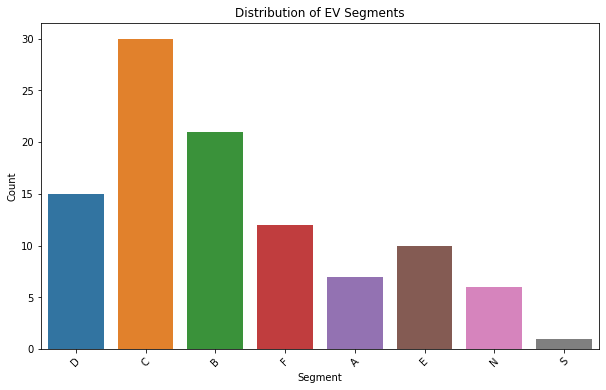

In [9]:
# Distribution of EV segments
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Segment')
plt.title('Distribution of EV Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Insights: The high-value contribution to the EV market primarily comes from the C and B segments, while the S segment has the least contribution.

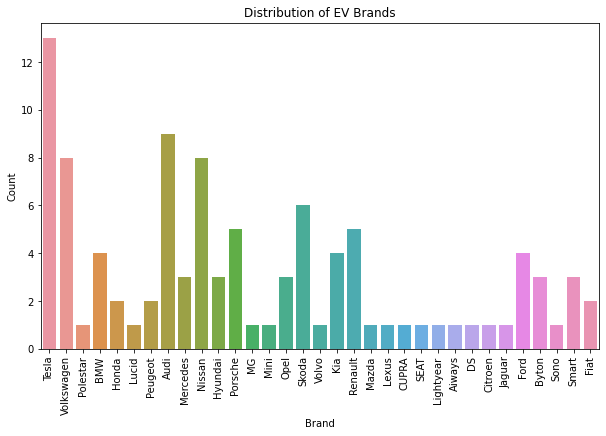

In [10]:
# Distribution of EV brands
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Brand')
plt.title('Distribution of EV Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Insights: In the EV market, Tesla, Audi, Nissan, and Volkswagen emerge as the prominent brands with the highest market share and occupancy.

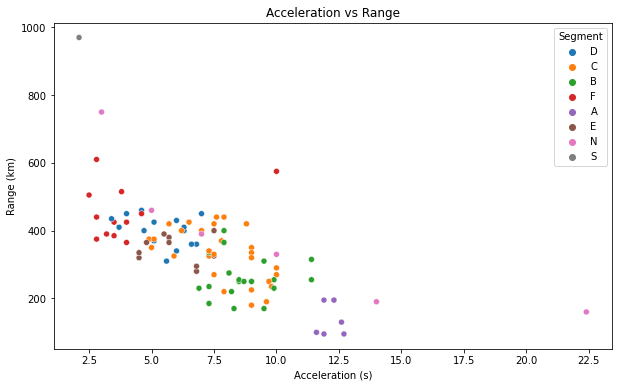

In [11]:
# Relationship between acceleration and range
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AccelSec', y='Range_Km', hue='Segment')
plt.title('Acceleration vs Range')
plt.xlabel('Acceleration (s)')
plt.ylabel('Range (km)')
plt.show()

Insights:The majority of EV segments fall within the acceleration range of 10 and speed range of 200 to 400 kilometers.

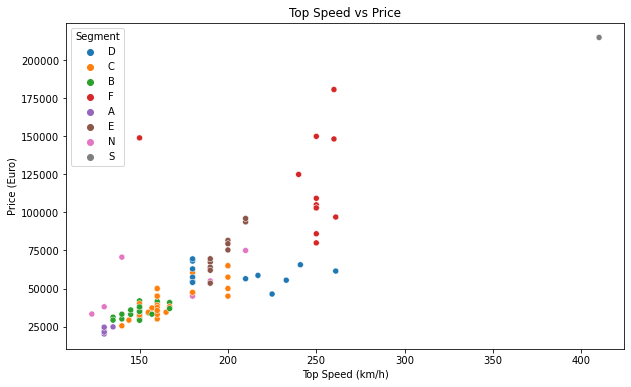

In [12]:
# Relationship between top speed and price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TopSpeed_KmH', y='PriceEuro', hue='Segment')
plt.title('Top Speed vs Price')
plt.xlabel('Top Speed (km/h)')
plt.ylabel('Price (Euro)')
plt.show()

Insights:The majority of EV segments offer a price range of 10 million and provide a speed range of 200 to 250 kilometers.

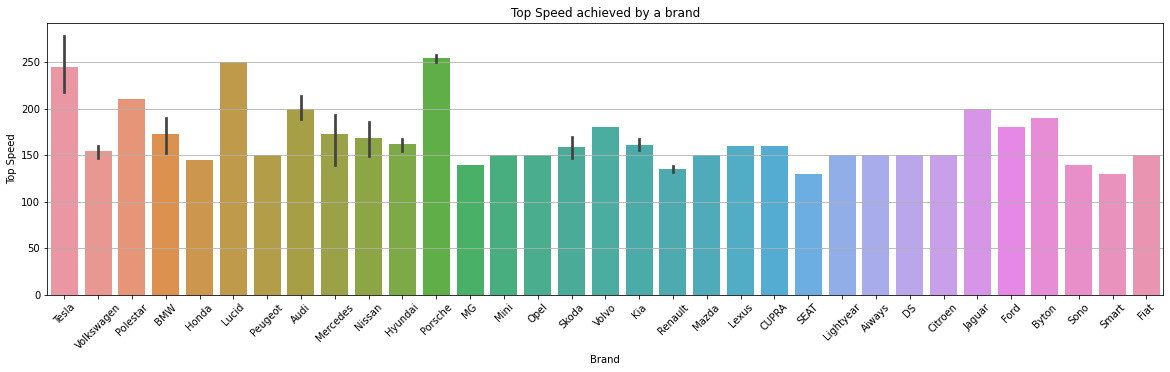

In [13]:
plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='TopSpeed_KmH',data=df)
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)
plt.show()

Insights:Among the brands, Tesla, Lucid, and Porsche offer the highest speeds, reaching up to 250 kilometers. In contrast, the seat brand offers relatively lower speeds compared to the other brands.

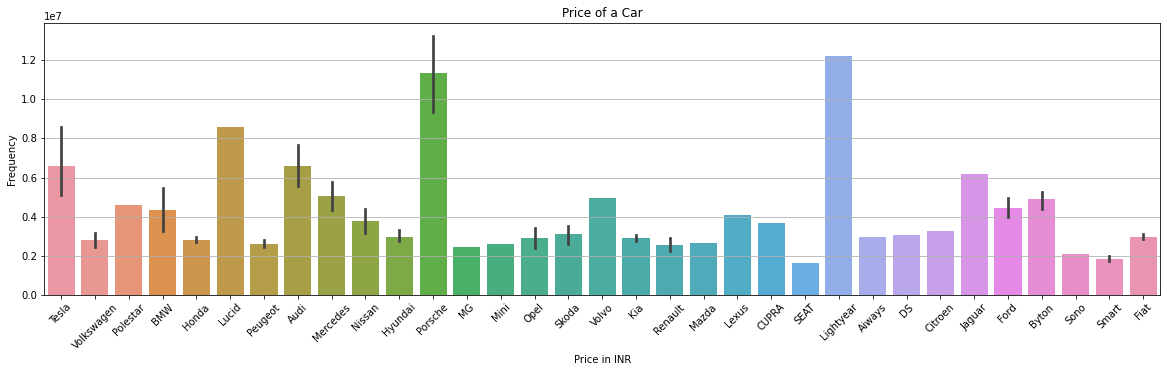

In [14]:

ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='INR',data=df)
plt.title('Price of a Car')
plt.xlabel('Price in INR')
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Insights:Among the brands in the EV market, Porsche, Lucid, and Lightyear offer their cars within the price range of 11 million to 12 million, making them relatively more expensive compared to other brands. On the other hand, SEAT is the brand that offers comparatively lower-priced EVs.

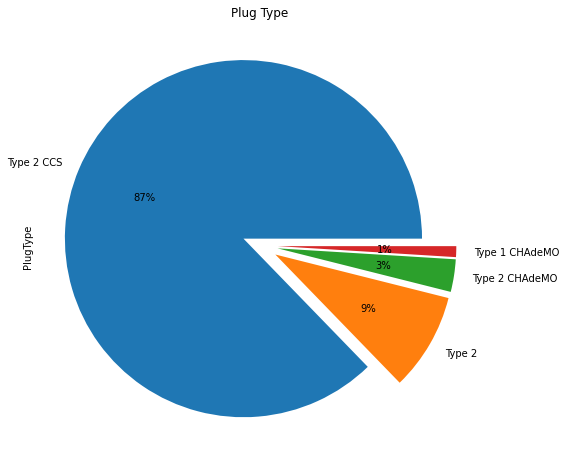

In [15]:
df['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')
plt.show()

Insights:Type 2 CCS is the most commonly used charging standard among companies, while Type 1 CHAdeMo is the least frequently utilized.

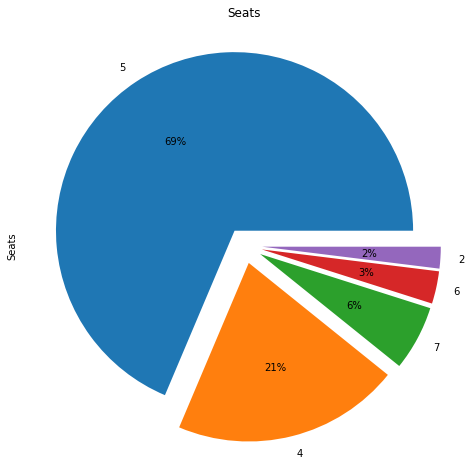

In [16]:
#Type of Plug used for charging
df['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')
plt.show()

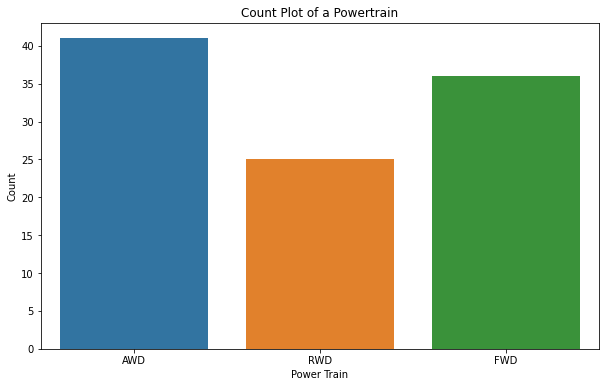

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='PowerTrain')
plt.title('Count Plot of a Powertrain')
plt.xlabel("Power Train")
plt.ylabel("Count")
plt.show()

Insights: The majority of EV vehicles feature and support either an AWD (All-Wheel Drive) or FWD (Front-Wheel Drive) powertrain engine system.

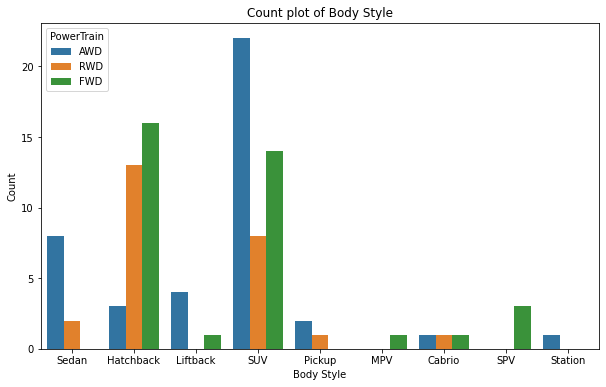

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='BodyStyle', hue="PowerTrain")
plt.title('Count plot of Body Style')
plt.xlabel("Body Style")
plt.ylabel("Count")
plt.show()

Insights:SUV body styles predominantly feature AWD (All-Wheel Drive) powertrain engines, while hatchback body styles commonly incorporate RWD (Rear-Wheel Drive) powertrain engines.
    

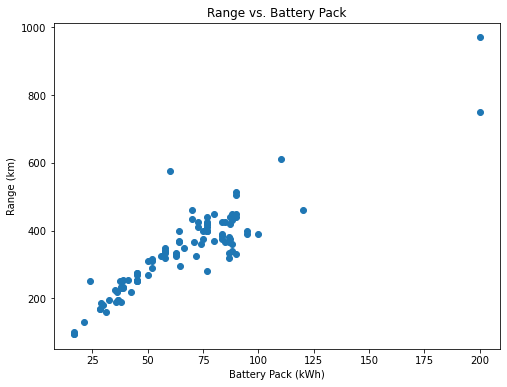

In [20]:
# Extract the range and battery pack data
range_km = df["Range_Km"].tolist()
battery_pack_kwh = df["Battery_Pack Kwh"].tolist()

# Plotting the chart
plt.figure(figsize=(8, 6))
plt.scatter(battery_pack_kwh, range_km)

# Set plot labels and title
plt.xlabel('Battery Pack (kWh)')
plt.ylabel('Range (km)')
plt.title('Range vs. Battery Pack')

# Display the chart
plt.show()

Insights:EV vehicles typically offer battery packs ranging from 100 to 125 kWh, accompanied by a speed range of 400 to 450 kilometers. However, vehicles equipped with a larger battery pack of 200 kWh provide a significantly higher speed range, reaching up to 1000 kilometers.

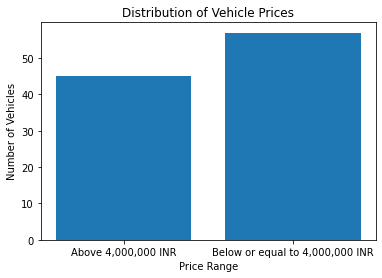

In [21]:
# Filter the dataset for prices above and below 4,000,000 INR
above_4m = df[df['INR'] > 4000000]
below_4m = df[df['INR'] <= 4000000]

# Count the number of vehicles in each price range
above_4m_count = above_4m.shape[0]
below_4m_count = below_4m.shape[0]

# Create the bar chart
plt.bar(['Above 4,000,000 INR', 'Below or equal to 4,000,000 INR'], [above_4m_count, below_4m_count])
plt.xlabel('Price Range')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Vehicle Prices')
plt.show()

Insights:The majority of EV vehicles fall within or below the price range of 40 million.

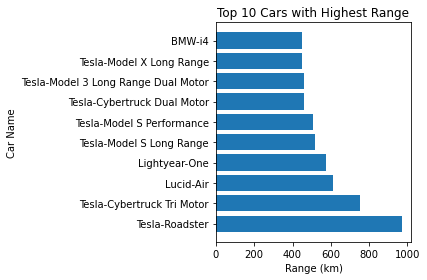

In [22]:
# Sort the dataset by range in descending order
sorted_dataset = df.sort_values('Range_Km', ascending=False)

# Select the top 10 cars with the highest range
top_10_cars = sorted_dataset.head(10)

# Extract the required columns
car_names = top_10_cars['car_name']
range_km = top_10_cars['Range_Km']

# Create the horizontal bar chart
plt.barh(car_names, range_km)
plt.xlabel('Range (km)')
plt.ylabel('Car Name')
plt.title('Top 10 Cars with Highest Range')
plt.tight_layout()
plt.show()

Insights:The majority of Tesla models offer an impressive range of up to 1000 kilometers, positioning them within the top 10 highest range EVs available.

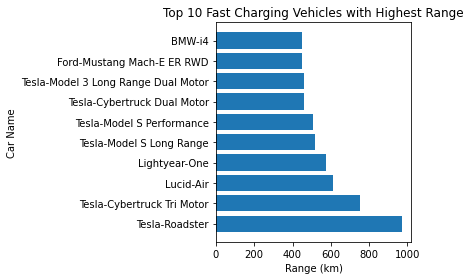

In [23]:
# Filter the dataset for fast charging vehicles
fast_charging_vehicles = df[df['RapidCharge'] == 'Yes']

# Sort the dataset by range in descending order
sorted_dataset = fast_charging_vehicles.sort_values('Range_Km', ascending=False)

# Select the top 10 fast charging vehicles with the highest range
top_10_fast_charging = sorted_dataset.head(10)

# Extract the required columns
car_names = top_10_fast_charging['car_name']
range_km = top_10_fast_charging['Range_Km']

# Create the horizontal bar chart
plt.barh(car_names, range_km)
plt.xlabel('Range (km)')
plt.ylabel('Car Name')
plt.title('Top 10 Fast Charging Vehicles with Highest Range')
plt.tight_layout()
plt.show()

Insights:The majority of Tesla models support the rapid charge feature, enabling faster charging times for EV owners.

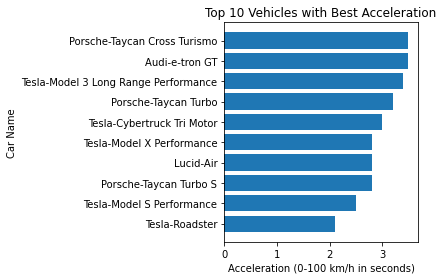

In [24]:
# Sort the dataset by acceleration in ascending order
sorted_dataset = df.sort_values('AccelSec')

# Select the top 10 vehicles with the best acceleration
top_10_acceleration = sorted_dataset.head(10)

# Extract the required columns
car_names = top_10_acceleration['car_name']
acceleration = top_10_acceleration['AccelSec']

# Create the horizontal bar chart
plt.barh(car_names, acceleration)
plt.xlabel('Acceleration (0-100 km/h in seconds)')
plt.ylabel('Car Name')
plt.title('Top 10 Vehicles with Best Acceleration')
plt.tight_layout()
plt.show()

Insights:The Porsche Taycan and Audi e-tron models offer exceptional acceleration, reaching speeds of 0 to 100 kilometers per hour in just a few seconds.

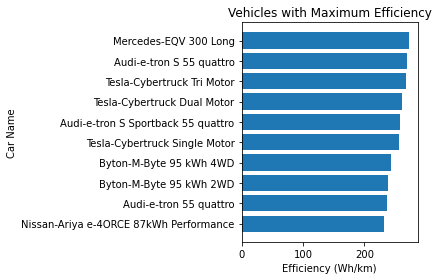

In [25]:
# Sort the dataset by efficiency in ascending order
sorted_dataset = df.sort_values('Efficiency_WhKm')

# Select the top 10 vehicles with the maximum efficiency
top_10_efficiency = sorted_dataset.tail(10)

# Extract the required columns
car_names = top_10_efficiency['car_name']
efficiency = top_10_efficiency['Efficiency_WhKm']

# Create the horizontal bar chart
plt.barh(car_names, efficiency)
plt.xlabel('Efficiency (Wh/km)')
plt.ylabel('Car Name')
plt.title('Vehicles with Maximum Efficiency')
plt.tight_layout()
plt.show()

insights:Mercedes, Audi, and Tesla models are known for their high efficiency in terms of energy consumption. These brands have made significant advancements in developing electric vehicles that maximize energy efficiency and offer impressive range per charge.

In [26]:
# Sort the DataFrame by efficiency
from tabulate import tabulate
efficiency = df.sort_values(by='Efficiency_WhKm')

# Select the desired columns
columns_to_display = ['car_name', 'Efficiency_WhKm', 'Range_Km', 'PowerTrain', 'Battery_Pack Kwh', 'INR']
selected_data = efficiency[columns_to_display]

# Convert the DataFrame to a table and print
table = tabulate(selected_data, headers='keys', tablefmt='psql')
print(table)

+-----+----------------------------------------+-------------------+------------+--------------+--------------------+-------------+
|     | car_name                               |   Efficiency_WhKm |   Range_Km | PowerTrain   |   Battery_Pack Kwh |         INR |
|-----+----------------------------------------+-------------------+------------+--------------+--------------------+-------------|
|  48 | Lightyear-One                          |               104 |        575 | AWD          |               60   | 1.21955e+07 |
|  14 | Hyundai-IONIQ Electric                 |               153 |        250 | FWD          |               38.3 | 2.82044e+06 |
|   8 | Tesla-Model 3 Standard Range Plus      |               153 |        310 | RWD          |               50   | 3.79616e+06 |
|  41 | Hyundai-Kona Electric 39 kWh           |               154 |        255 | FWD          |               39   | 2.7805e+06  |
|  74 | Sono-Sion                              |               156 |        

Price Category: < 2M
Volkswagen-e-Up!, SEAT-Mii Electric, Smart-EQ forfour, Smart-EQ fortwo coupe

Price Category: 2M - 4M
Volkswagen-ID.3 Pure, Honda-e, Volkswagen-e-Golf, Peugeot-e-208, Tesla-Model 3 Standard Range Plus, Nissan-Leaf, Hyundai-Kona Electric 64 kWh, Hyundai-IONIQ Electric, Volkswagen-ID.3 Pro S, MG-ZS EV, Mini-Cooper SE, Opel-Corsa-e, Skoda-Enyaq iV 50, Volkswagen-ID.4, Volkswagen-ID.3 Pro, BMW-i3 120 Ah, Peugeot-e-2008 SUV, Kia-e-Niro 64 kWh, Renault-Zoe ZE50 R110, Mazda-MX-30, Nissan-Leaf e+, CUPRA-el-Born, Renault-Zoe ZE50 R135, Mercedes-EQA, Hyundai-Kona Electric 39 kWh, Skoda-CITIGOe iV, Kia-E -Soul 64 kWh, Opel-Ampera-e, Aiways-U5, Opel-Mokka-e, Skoda-Enyaq iV 80, Honda-e Advance, DS-3 Crossback E-Tense, Renault-Twingo ZE, Citroen-e-C4, Renault-Zoe ZE40 R110, Nissan-e-NV200 Evalia, Renault-Kangoo Maxi ZE 33, BMW-i3s 120 Ah, Skoda-Enyaq iV 80X, Sono-Sion, Kia-e-Niro 39 kWh, Volkswagen-ID.3 1st, Ford-Mustang Mach-E SR RWD, Fiat-500e Hatchback, Tesla-Cybertruck Singl

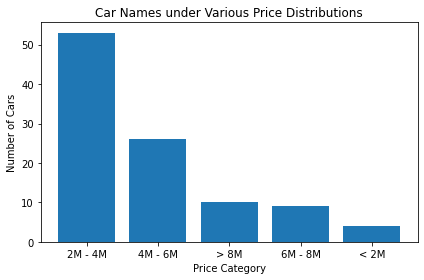

In [27]:
# Set the price distribution bins
price_bins = [0, 2000000, 4000000, 6000000, 8000000, float('inf')]
price_labels = ['< 2M', '2M - 4M', '4M - 6M', '6M - 8M', '> 8M']

# Bin the prices into different ranges
df['Price_Category'] = pd.cut(df['INR'], bins=price_bins, labels=price_labels, include_lowest=True)

# Group the dataset by price category and get the car names in each category
car_names_by_price = df.groupby('Price_Category')['car_name'].apply(list)

# Print the car names under each price distribution
for price_category, car_names in car_names_by_price.items():
    print(f'Price Category: {price_category}')
    print(', '.join(car_names))
    print()
# Count the number of car names in each price category
car_counts = df['Price_Category'].value_counts()

# Create the bar chart
plt.bar(car_counts.index, car_counts.values)
plt.xlabel('Price Category')
plt.ylabel('Number of Cars')
plt.title('Car Names under Various Price Distributions')
plt.tight_layout()
plt.show()

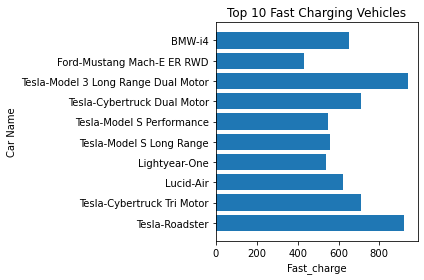

In [38]:
# Sort the dataset by acceleration in ascending order
sorted_dataset = df.sort_values('FastCharge_KmH')

# Select the top 10 vehicles with the best acceleration
top_10_acceleration = sorted_dataset.head(10)
# Extract the required columns
car_names = top_10_fast_charging['car_name']
fast_charge = top_10_fast_charging['FastCharge_KmH']

# Create the horizontal bar chart
plt.barh(car_names, fast_charge)
plt.xlabel('Fast_charge')
plt.ylabel('Car Name')
plt.title('Top 10 Fast Charging Vehicles')
plt.tight_layout()
plt.show()

Insights:
The Tesla Model 3, Tesla Roadster, and BMW i4 are equipped with fast charging capabilities, allowing for quick charging times and convenient access to charging infrastructure.

In [29]:
# Select relevant features for clustering
features = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Battery_Pack Kwh', 'Efficiency_WhKm', 'FastCharge_KmH', 'Seats', 'PriceEuro']
X = df[features]

In [30]:
X.head()

,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
0,4.6,233,460,70.0,161,940,5,55480
1,10.0,160,270,45.0,167,250,5,30000
2,4.7,210,400,75.0,181,620,5,56440
3,6.8,180,360,74.0,206,560,5,68040
4,9.5,145,170,28.5,168,190,4,32997


In [31]:
# Handle missing values (if any)
X = X.fillna(X.mean())

# Normalize numerical features
X = (X - X.mean()) / X.std()

In [32]:
import pandas as pd
from sklearn.cluster import KMeans
# Set the number of clusters
num_clusters = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

In [33]:
# Add cluster labels to the dataset
df['Cluster'] = clusters

In [34]:
# Analyze the segments
segment_analysis = df.groupby('Cluster').mean()

# Print the segment analysis
segment_analysis

,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,INR
Cluster,,,,,,,,,
0,2.100000,410.000000,970.000000,200.000000,206.000000,920.000000,4.000000,215000.000000,1.759756e+07
1,6.066667,190.000000,365.000000,87.466667,235.500000,487.222222,5.222222,67900.500000,5.557595e+06
2,3.581250,245.812500,460.312500,90.362500,197.875000,745.000000,5.187500,100218.062500,8.202758e+06
3,7.063333,172.100000,384.000000,69.550000,179.633333,482.666667,4.933333,49620.233333,4.061371e+06
4,10.091892,144.972973,219.324324,36.910811,170.513514,225.675676,4.567568,31958.081081,2.615740e+06


### CONCLUSION:
Cluster 0 represents a segment of high-performance electric vehicles with excellent acceleration (2.1 seconds) and a top speed of 410 km/h. These vehicles have a long-range capability (970 km) and a large battery pack (200 kWh), which enables them to cover extensive distances. They exhibit good efficiency (206 Wh/km) and have a fast charging rate (920 km/h). The seating capacity is four, and the price of these vehicles is relatively high at €215,000 (₹17,597,560). This segment targets enthusiasts and consumers who prioritize performance and are willing to invest in high-end electric vehicles.

Cluster 1 corresponds to a segment of electric vehicles with moderate performance characteristics. These vehicles have an average acceleration of 6.07 seconds and a top speed of 190 km/h. The range is 365 km, and the battery pack capacity is 87.47 kWh. The efficiency is 235.5 Wh/km, and the fast charging rate is 487.22 km/h. The seating capacity is around 5, and the price falls in the range of €67,900.50 (₹5,557,595). This segment targets individuals who seek a balance between performance and affordability.

Cluster 2 represents a segment of electric vehicles with good acceleration (3.58 seconds) and a higher top speed of 245.81 km/h. These vehicles offer a decent range of 460.31 km and have a battery pack capacity of 90.36 kWh. The efficiency is 197.88 Wh/km, and the fast charging rate is 745 km/h. They provide comfortable seating for around 5 individuals, and the price is approximately €100,218.06 (₹8,202,758). This segment caters to consumers who prioritize a blend of performance, range, and affordability.

Cluster 3 corresponds to a segment of electric vehicles with slower acceleration (7.06 seconds) and a lower top speed of 172.1 km/h. The range offered by these vehicles is 384 km, and the battery pack capacity is 69.55 kWh. The efficiency is 179.63 Wh/km, and the fast charging rate is 482.67 km/h. The seating capacity is around 4.93, and the price is relatively affordable at €49,620.23 (₹4,061,371). This segment targets cost-conscious consumers who prioritize practicality and value for money.

Cluster 4 represents a segment of electric vehicles with lower performance characteristics. These vehicles have a slower acceleration (10.09 seconds) and a top speed of 144.97 km/h. The range offered is 219.32 km, and the battery pack capacity is 36.91 kWh. The efficiency is 170.51 Wh/km, and the fast charging rate is 225.68 km/h. The seating capacity is 4.57, and the price is relatively affordable at €31,958.08 (₹2,615,740). This segment targets budget-conscious consumers who prioritize affordability and urban commuting.

These detailed conclusions provide insights into the characteristics and target audience of each segment based on the clustering analysis. They can assist in formulating a market entry strategy, including product positioning, pricing, and marketing efforts, to effectively target the identified segments in the Indian electric vehicle market.
